# Setup

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
print('keras using %s backend'%keras.backend.backend())
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

Using TensorFlow backend.


keras using tensorflow backend



Bad key "text.kerning_factor" on line 4 in
/Users/dathuynh/opt/anaconda3/envs/tf/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [3]:
import IPython.display as display
from PIL import Image
import os

In [4]:
tf.__version__

'2.2.0'

In [5]:
import pandas as pd
dataset = pd.read_csv('dataset/Chest_xray_Corona_Metadata.csv')
# Preview the dataset
print(dataset.head())

   Unnamed: 0   X_ray_image_name   Label Dataset_type Label_2_Virus_category  \
0           0  IM-0128-0001.jpeg  Normal        TRAIN                    NaN   
1           1  IM-0127-0001.jpeg  Normal        TRAIN                    NaN   
2           2  IM-0125-0001.jpeg  Normal        TRAIN                    NaN   
3           3  IM-0122-0001.jpeg  Normal        TRAIN                    NaN   
4           4  IM-0119-0001.jpeg  Normal        TRAIN                    NaN   

  Label_1_Virus_category  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  


In [6]:
# Remove the extra column and change the 'Label' to binary values
dataset = dataset.drop(['Unnamed: 0'], axis=1)
dataset['Label'].replace({"Normal": 0, "Pnemonia": 1}, inplace=True)
dataset = dataset.fillna(0)

In [7]:
dataset.set_index('X_ray_image_name', inplace=True)

In [8]:
print(dataset.head())
print("Shape of data set:", dataset.shape)

                   Label Dataset_type Label_2_Virus_category  \
X_ray_image_name                                               
IM-0128-0001.jpeg      0        TRAIN                      0   
IM-0127-0001.jpeg      0        TRAIN                      0   
IM-0125-0001.jpeg      0        TRAIN                      0   
IM-0122-0001.jpeg      0        TRAIN                      0   
IM-0119-0001.jpeg      0        TRAIN                      0   

                  Label_1_Virus_category  
X_ray_image_name                          
IM-0128-0001.jpeg                      0  
IM-0127-0001.jpeg                      0  
IM-0125-0001.jpeg                      0  
IM-0122-0001.jpeg                      0  
IM-0119-0001.jpeg                      0  
Shape of data set: (5910, 4)


In [9]:
import pathlib
data_dir = pathlib.Path('dataset/Coronahack-Chest-XRay-Dataset')

In [10]:
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

5887


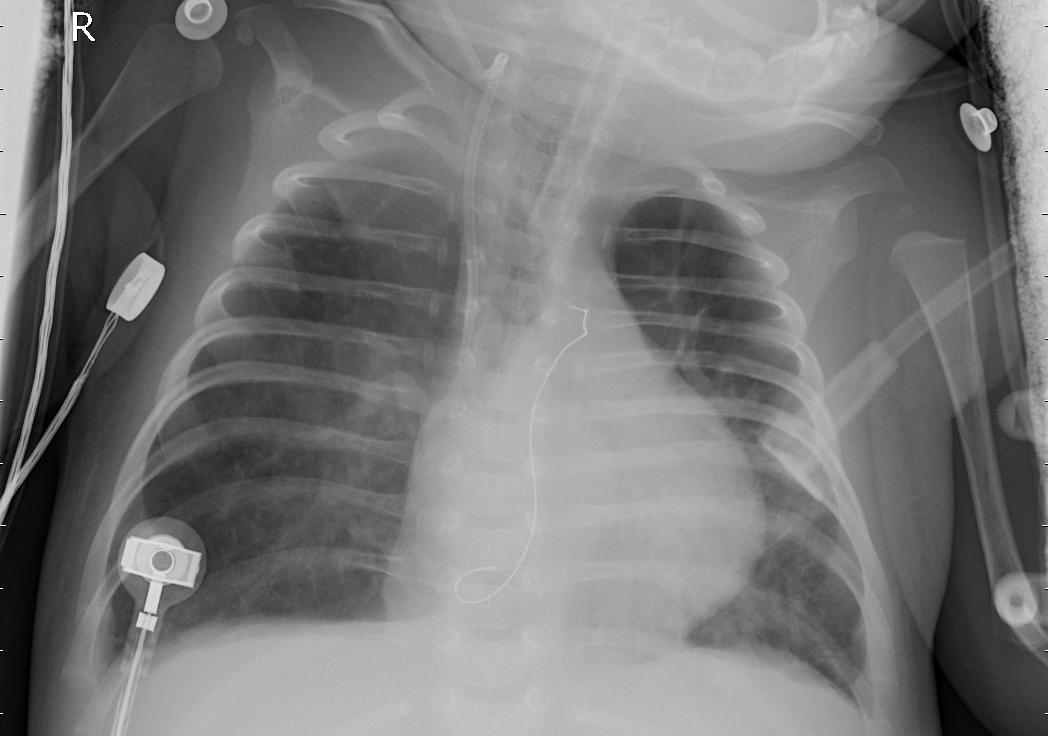

5263


In [11]:
train_img = list(data_dir.glob('train/*.jpeg'))
for image_path in train_img[:1]:
    display.display(Image.open(str(image_path)))
print(len(train_img))

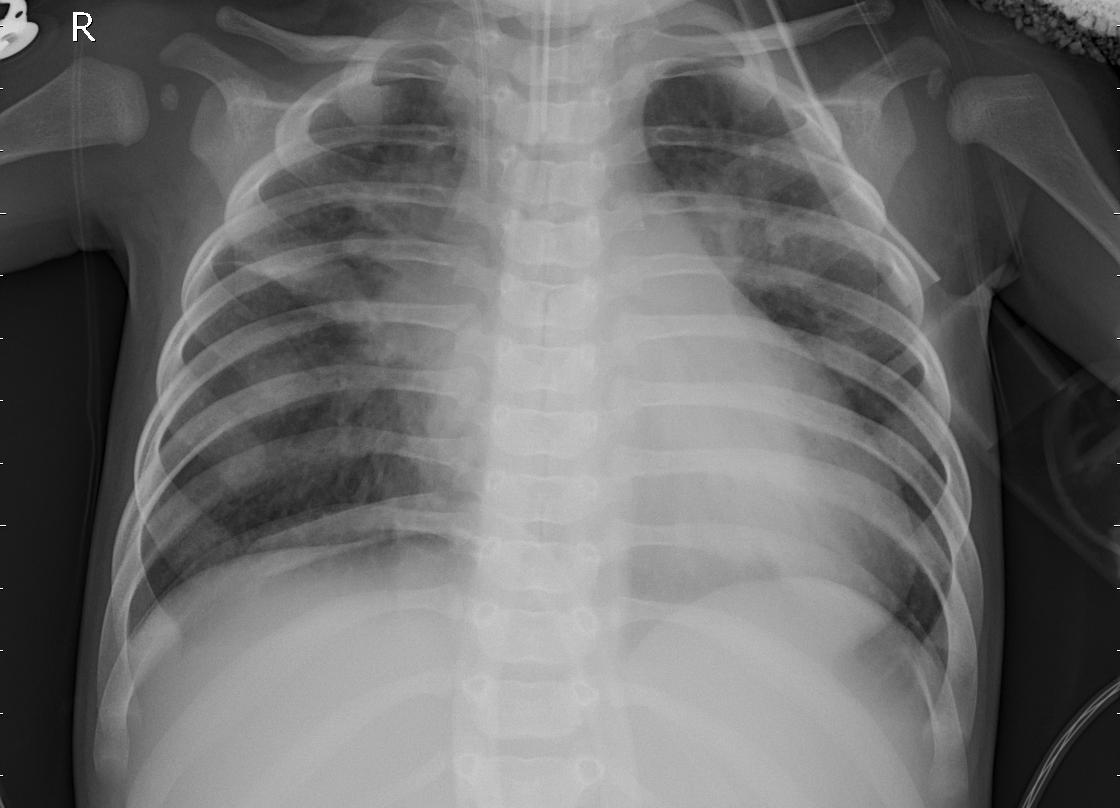

624


In [12]:
test_img = list(data_dir.glob('test/*.jpeg'))
for image_path in test_img[:1]:
    display.display(Image.open(str(image_path)))
print(len(test_img))

In [13]:
# Check a dataset length
def ds_length(dataset):
    num_elements = 0
    for element in dataset:
        num_elements += 1
    return num_elements

In [14]:
# To load the files as a tf.data.Dataset first create a train dataset of the file paths
train_dir1 = tf.data.Dataset.list_files(str(data_dir/'train/NORMAL*.jpeg'))
train_dir2 = tf.data.Dataset.list_files(str(data_dir/'train/person*.jpeg'))
train_dir3 = tf.data.Dataset.list_files(str(data_dir/'train/IM*.jpeg'))
train_dir = (train_dir1.concatenate(train_dir2)).concatenate(train_dir3)
print('Number of train samples: ', ds_length(train_dir))

Number of train samples:  5216


In [15]:
for f in train_dir.take(5):
    print(f.numpy())

b'dataset/Coronahack-Chest-XRay-Dataset/train/NORMAL2-IM-0939-0001.jpeg'
b'dataset/Coronahack-Chest-XRay-Dataset/train/NORMAL2-IM-1260-0001.jpeg'
b'dataset/Coronahack-Chest-XRay-Dataset/train/NORMAL2-IM-1269-0001-0001.jpeg'
b'dataset/Coronahack-Chest-XRay-Dataset/train/NORMAL2-IM-0582-0001.jpeg'
b'dataset/Coronahack-Chest-XRay-Dataset/train/NORMAL2-IM-1196-0001.jpeg'


In [16]:
# To load the files as a tf.data.Dataset first create a test dataset of the file paths
test_dir = tf.data.Dataset.list_files(str(data_dir/'test/*.jpeg'))
print('Number of test samples: ', ds_length(test_dir))

Number of test samples:  624


In [17]:
for f in test_dir.take(5):
    print(f.numpy())

b'dataset/Coronahack-Chest-XRay-Dataset/test/person114_bacteria_544.jpeg'
b'dataset/Coronahack-Chest-XRay-Dataset/test/person100_bacteria_479.jpeg'
b'dataset/Coronahack-Chest-XRay-Dataset/test/person109_bacteria_528.jpeg'
b'dataset/Coronahack-Chest-XRay-Dataset/test/person90_bacteria_442.jpeg'
b'dataset/Coronahack-Chest-XRay-Dataset/test/person130_bacteria_625.jpeg'
